# **Comparative Analysis of Digital Filters: FIR, IIR, and Adaptive LMS for Noise Reduction in Sinusoidal Signals - Krzysztof Wąsik**


1. **FIR Filter:** A Finite Impulse Response filter that applies convolution with fixed coefficients.
2. **IIR Filter:** An Infinite Impulse Response filter that uses both feedforward and feedback components.
3. **Adaptive LMS Filter:** An adaptive filter using the Least Mean Squares algorithm to reduce noise.

A noisy sinusoidal signal is generated and processed by each filter. The results are visualized using subplots.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
fs = 1000
t = np.linspace(0, 1, fs)
freq = 5
clean_signal = np.sin(2 * np.pi * freq * t)
noise = 0.5 * np.random.randn(len(t))
noisy_signal = clean_signal + noise

## **1. FIR Filter Implementation**

The FIR (Finite Impulse Response) processes the input signal by convolving it with the given coefficient vector.

In [3]:
def fir_filter(x, b):
    M = len(b)
    y = np.zeros(len(x))
    for n in range(M - 1, len(x)):
        y[n] = np.dot(b, x[n - M + 1:n + 1][::-1])
    return y
fir_coeffs = [1, 0, -1]
fir_filtered = fir_filter(noisy_signal, fir_coeffs)

## **2. IIR Filter Implementation**

The IIR (Infinite Impulse Response), it uses both a feedforward (numerator) and a feedback (denominator) component. Zero-padding is used to handle the initial samples.

In [4]:
def iir_filter(x, b, a):
    M = len(b)
    N = len(a)
    x_pad = np.concatenate((np.zeros(M - 1), x))
    y_pad = np.zeros_like(x_pad)
    for n in range(M - 1, len(x_pad)):
        y_pad[n] = np.dot(b, x_pad[n - M + 1:n + 1][::-1])
        if n > M - 1:
            feedback = np.dot(a[1:], y_pad[n - (N - 1): n][::-1])
            y_pad[n] -= feedback
    return y_pad[M - 1:]
iir_b = [0.4, 0.6]
iir_a = [1, -0.3]
iir_filtered = iir_filter(noisy_signal, iir_b, iir_a)

## **3. Adaptive LMS Filter Implementation**

The LMS (Least Mean Squares) adaptive filter updates its coefficients iteratively to minimize the error between the filter output and the desired (clean) signal.

In [5]:
def lms_filter(x, d, mu, num_taps):
    n = len(x)
    w = np.zeros(num_taps)
    y = np.zeros(n)
    e = np.zeros(n)
    for i in range(num_taps, n):
        x_segment = x[i - num_taps:i][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w = w + mu * e[i] * x_segment
    return y, e, w
lms_mu = 0.02
num_taps = 5
lms_filtered, error_signal, final_weights = lms_filter(noisy_signal, clean_signal, lms_mu, num_taps)

## **4. Plotting the Results**

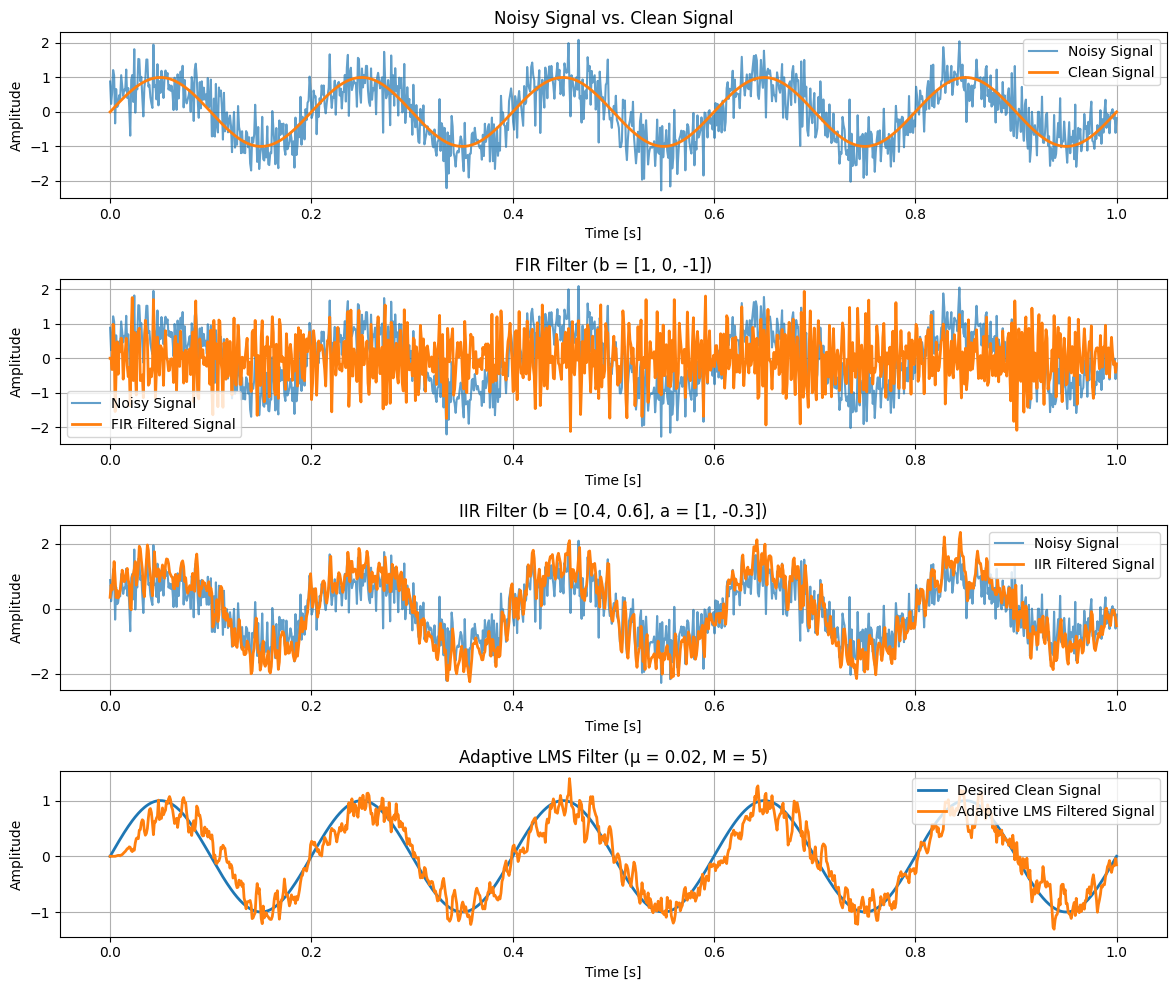

In [6]:
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.plot(t, clean_signal, label='Clean Signal', linewidth=2)
plt.title('Noisy Signal vs. Clean Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.plot(t, fir_filtered, label='FIR Filtered Signal', linewidth=2)
plt.title('FIR Filter (b = [1, 0, -1])')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.plot(t, iir_filtered, label='IIR Filtered Signal', linewidth=2)
plt.title('IIR Filter (b = [0.4, 0.6], a = [1, -0.3])')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, clean_signal, label='Desired Clean Signal', linewidth=2)
plt.plot(t, lms_filtered, label='Adaptive LMS Filtered Signal', linewidth=2)
plt.title('Adaptive LMS Filter (μ = 0.02, M = 5)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## **5. Conclusion**  

The choice of filter depends on the specific application and noise characteristics. While FIR and IIR filters offer static solutions, the adaptive LMS filter provides a dynamic approach that can better handle changing signal environments.